# Processing Data 

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from matplotlib import style
import scipy.stats as stats

import seaborn as sns

style.use('ggplot')
%matplotlib inline 

In [2]:
df = pd.read_excel('uralsib_data.xlsx')

In [3]:
df.head()

,Месяц выдачи кредита,Сумма кредита,Срок кредита,Возраст клиента,Пол клиента,Образование клиента,Тип товара,Наличие детей у клиента,Регион выдачи кредита,Доход клиента,Семейное положение,Оператор связи,Является ли клиентом банка,Флаг дефолта по кредиту
0,1,7000,12,39,Мужской,Среднее специальное,Мобильные телефоны,Детей нет,Другие регионы,21000,Другое,МТС,Не клиент банка,Нет дефолта
1,1,19000,6,20,Мужской,Среднее специальное,Бытовая техника,Дети есть,Другие регионы,17000,Другое,Теле2,Клиент банка,Нет дефолта
2,1,29000,12,23,Женский,Среднее специальное,Бытовая техника,Детей нет,Другие регионы,31000,Другое,Билайн,Не клиент банка,Нет дефолта
3,1,10000,12,30,Мужской,Среднее специальное,Мобильные телефоны,Дети есть,Другие регионы,31000,Никогда не был(а) женат/замужем,Теле2,Клиент банка,Нет дефолта
4,1,14500,12,25,Женский,Высшее,Мобильные телефоны,Детей нет,Другие регионы,26000,Женат/замужем,МТС,Клиент банка,Нет дефолта


In [4]:
df.tail()

,Месяц выдачи кредита,Сумма кредита,Срок кредита,Возраст клиента,Пол клиента,Образование клиента,Тип товара,Наличие детей у клиента,Регион выдачи кредита,Доход клиента,Семейное положение,Оператор связи,Является ли клиентом банка,Флаг дефолта по кредиту
1718,12,18500,6,32,Мужской,Высшее,Мобильные телефоны,Дети есть,Другие регионы,46000,Другое,Мегафон,Клиент банка,Нет дефолта
1719,12,6500,6,24,Мужской,Среднее специальное,Мобильные телефоны,Детей нет,Другие регионы,18000,Другое,МТС,Клиент банка,Нет дефолта
1720,12,5500,12,21,Мужской,Неоконченное высшее,Мобильные телефоны,Детей нет,Другие регионы,15000,Другое,Мегафон,Клиент банка,Нет дефолта
1721,12,30500,10,25,Женский,Неоконченное высшее,Мобильные телефоны,Детей нет,Другие регионы,41000,Другое,Билайн,Клиент банка,Дефолт
1722,12,116000,24,34,Мужской,Высшее,"Одежда, изделия из меха и кожи",Дети есть,Другие регионы,41000,Другое,Билайн,Не клиент банка,Нет дефолта


In [5]:
df.describe()

,Месяц выдачи кредита,Сумма кредита,Срок кредита,Возраст клиента,Доход клиента
count,1723.000000,1723.000000,1723.000000,1723.000000,1723.000000
mean,6.708067,29264.654672,11.546721,35.911782,32652.350551
std,3.538420,27926.778301,6.548354,13.120203,20913.193158
min,1.000000,5000.000000,3.000000,18.000000,1000.000000
25%,3.000000,13000.000000,6.000000,26.000000,21000.000000
50%,7.000000,21500.000000,12.000000,32.000000,27000.000000
75%,10.000000,34000.000000,12.000000,44.000000,38000.000000
max,12.000000,301000.000000,36.000000,90.000000,401000.000000


In [6]:
df['Флаг дефолта по кредиту'] = np.where(df['Флаг дефолта по кредиту'] == 'Дефолт',1,0)

In [7]:
y = df['Флаг дефолта по кредиту'].values
import numpy as np
print(np.unique(y))

del df['Флаг дефолта по кредиту']
X = df.values

[0 1]


#  Data Visualisation 

(1723,) (1723, 13)
196 счетов в дефолте и 1527 счетов платежеспособны


Text(0,0.5,'платежеспособный                    дефолт')

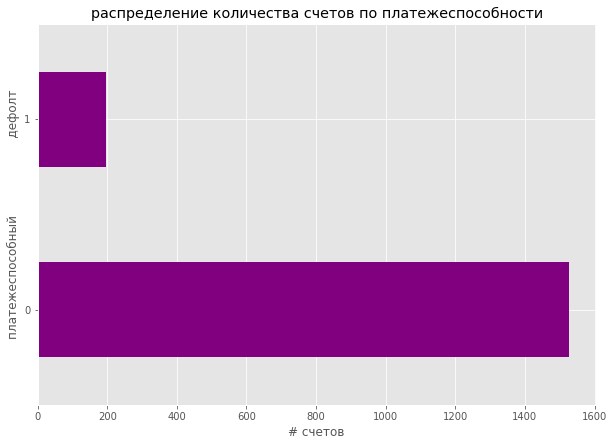

In [8]:
print(y.shape, X.shape)
nodefl, defl = np.bincount([int(i) for i in y ])


fig = plt.figure()
fig.set_size_inches(10,7)
d = df.groupby([y]).size()

print('%s счетов в дефолте и %s счетов платежеспособны' % (defl, nodefl))
p = d.plot(kind='barh', color='purple', 
           title = 'распределение количества счетов по платежеспособности')
plt.xlabel('# счетов')
plt.ylabel('платежеспособный                    дефолт')


In [9]:
df['Возраст клиента по категориям'] = pd.cut(df['Возраст клиента'], 
                                             range(18, 91, 12), right=False)

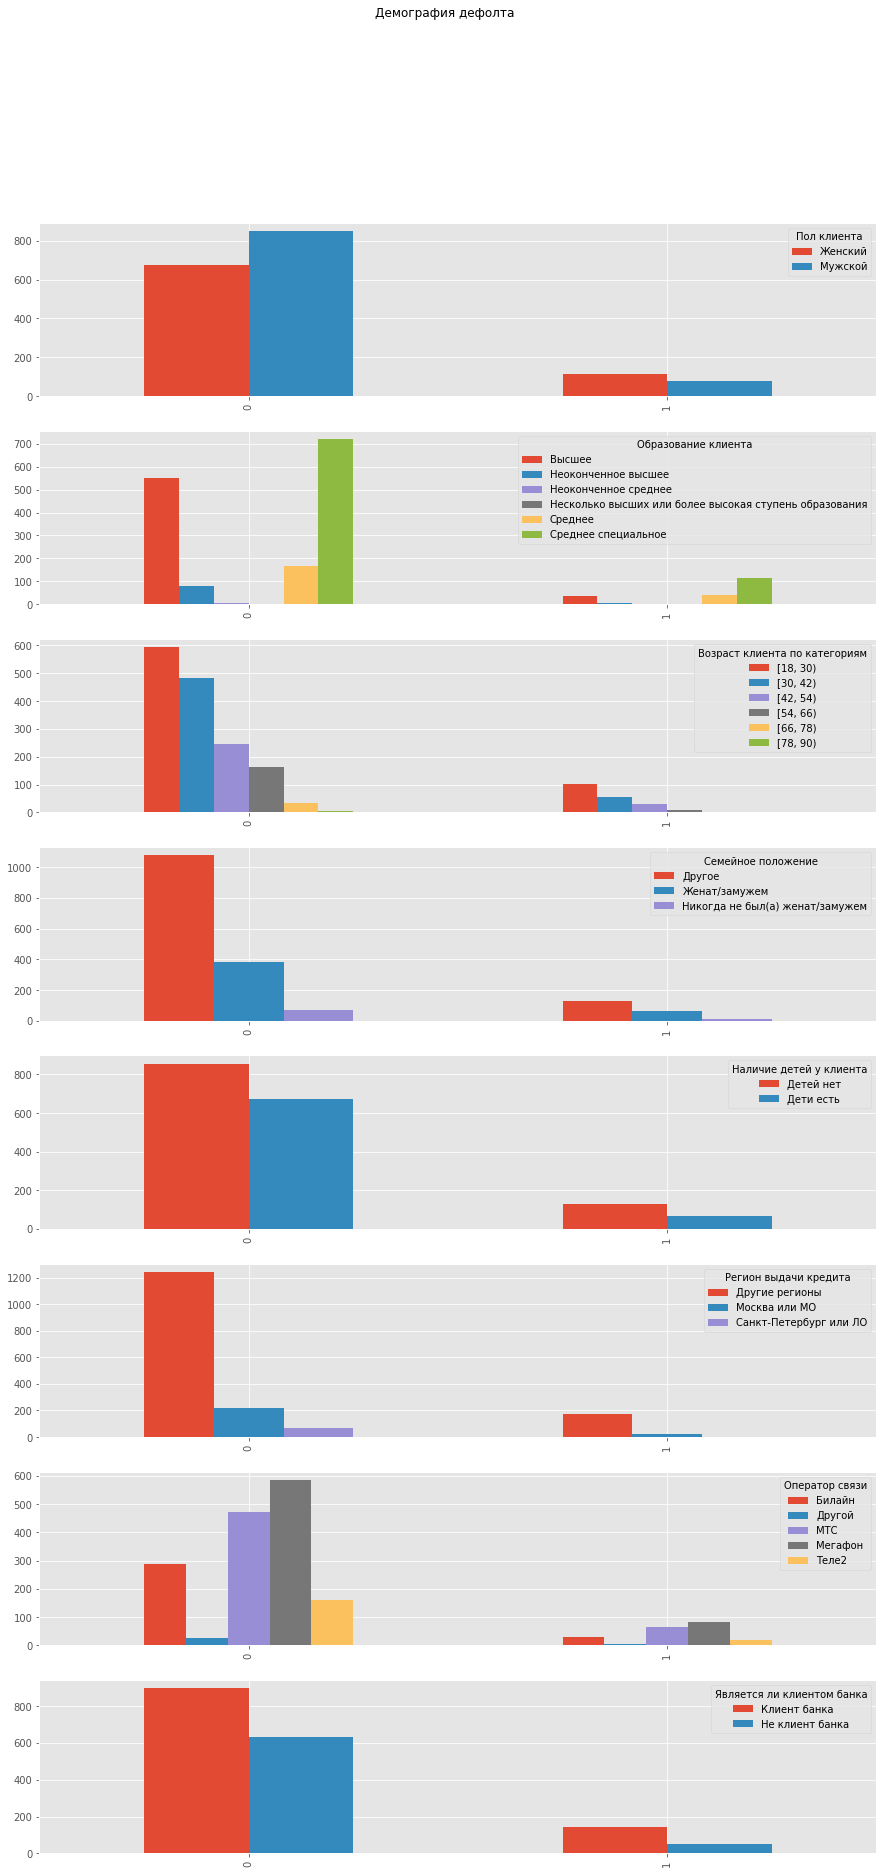

In [10]:
fig, ax = plt.subplots(8,1)
fig.set_size_inches(15,30)
fig.suptitle('Демография дефолта')


d = df.groupby([y, 'Пол клиента']).size()
p = d.unstack(level=1).plot(kind='bar', ax=ax[0])

d = df.groupby([y, 'Образование клиента']).size()
p = d.unstack(level=1).plot(kind='bar', ax=ax[1],legend = 'best')


d = df.groupby([y, 'Возраст клиента по категориям']).size()
p = d.unstack(level=1).plot(kind='bar', ax=ax[2])

d = df.groupby([y, 'Семейное положение']).size()
p = d.unstack(level=1).plot(kind='bar', ax=ax[3])

d = df.groupby([y, 'Наличие детей у клиента']).size()
p = d.unstack(level=1).plot(kind='bar', ax=ax[4])

d = df.groupby([y, 'Регион выдачи кредита']).size()
p = d.unstack(level=1).plot(kind='bar', ax=ax[5])

d = df.groupby([y, 'Оператор связи']).size()
p = d.unstack(level=1).plot(kind='bar', ax=ax[6])


d = df.groupby([y, 'Является ли клиентом банка']).size()
p = d.unstack(level=1).plot(kind='bar', ax=ax[7])


In [11]:
df['Доход клиента по категориям'] = pd.cut(df['Доход клиента'],20,right = False)
df['Кредит клиента по категориям'] = pd.cut(df['Сумма кредита'],range(4999,301001,10000),right = False )

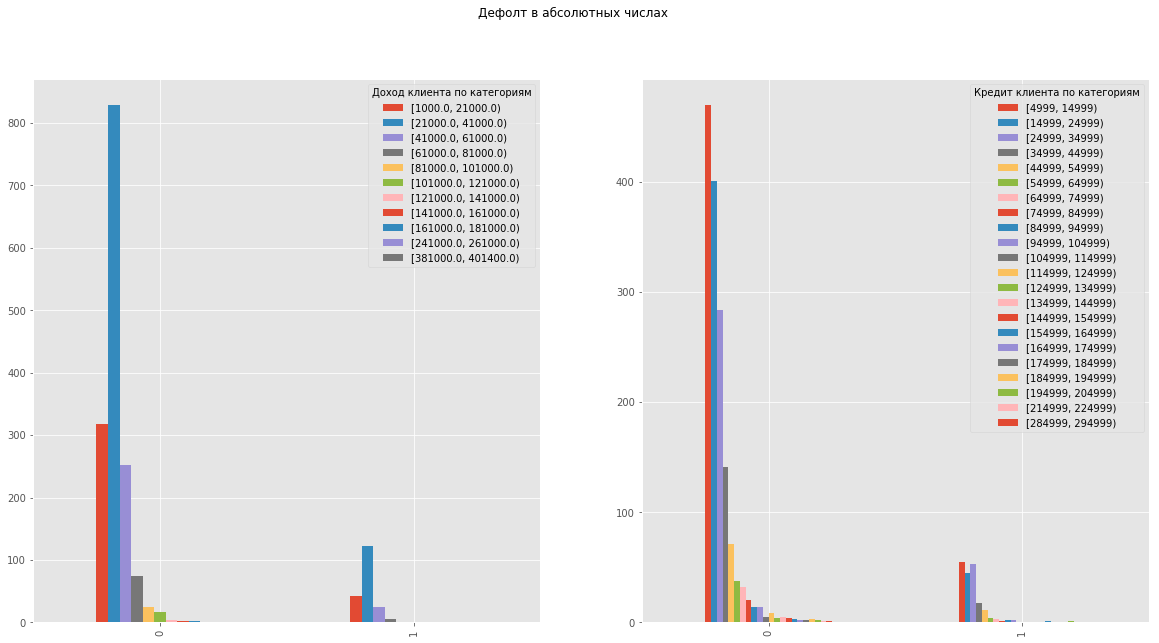

In [12]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches(20,10)
fig.suptitle('Дефолт в абсолютных числах')


d = df.groupby([y, 'Доход клиента по категориям']).size()
p = d.unstack(level=1).plot(kind='bar',ax=ax[0])

d = df.groupby([y, 'Кредит клиента по категориям']).size()
p = d.unstack(level=1).plot(kind='bar', ax=ax[1],legend = 'best')


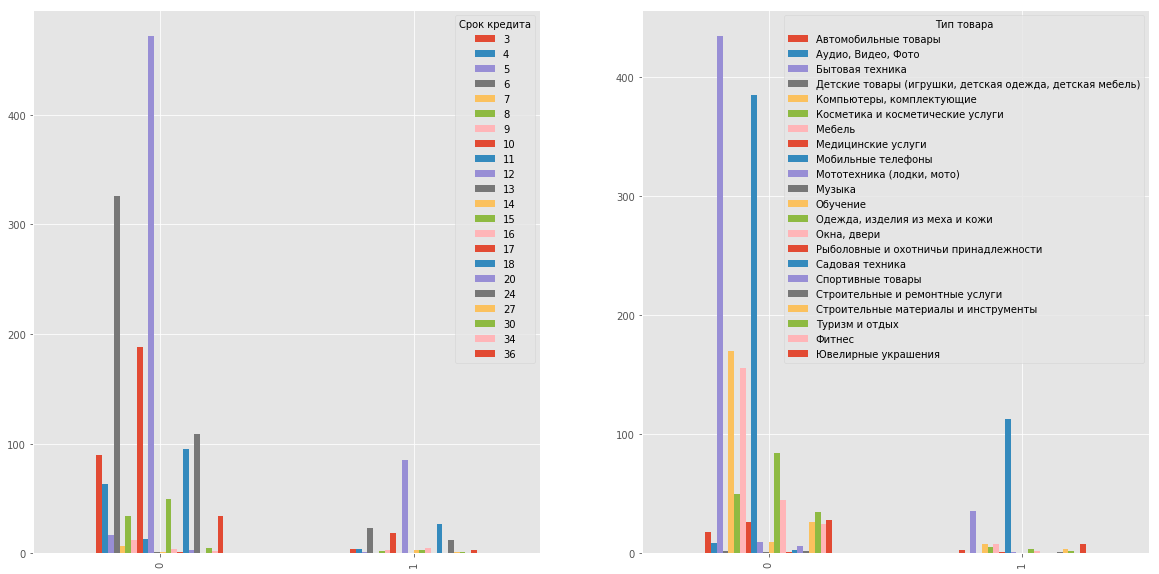

In [13]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches(20,10)

d = df.groupby([y, 'Срок кредита']).size()
p = d.unstack(level=1).plot(kind='bar', ax=ax[0])

d = df.groupby([y, 'Тип товара']).size()
p = d.unstack(level=1).plot(kind='bar', ax=ax[1],legend = 'best')

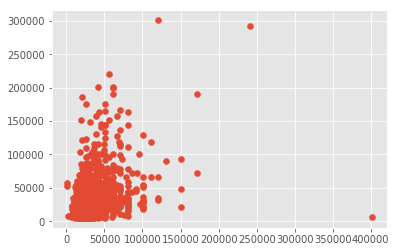

In [14]:
plt.scatter(df['Доход клиента'],df['Сумма кредита'])


# Data Analysis 

In [15]:
df.head()

,Месяц выдачи кредита,Сумма кредита,Срок кредита,Возраст клиента,Пол клиента,Образование клиента,Тип товара,Наличие детей у клиента,Регион выдачи кредита,Доход клиента,Семейное положение,Оператор связи,Является ли клиентом банка,Возраст клиента по категориям,Доход клиента по категориям,Кредит клиента по категориям
0,1,7000,12,39,Мужской,Среднее специальное,Мобильные телефоны,Детей нет,Другие регионы,21000,Другое,МТС,Не клиент банка,"[30, 42)","[21000.0, 41000.0)","[4999, 14999)"
1,1,19000,6,20,Мужской,Среднее специальное,Бытовая техника,Дети есть,Другие регионы,17000,Другое,Теле2,Клиент банка,"[18, 30)","[1000.0, 21000.0)","[14999, 24999)"
2,1,29000,12,23,Женский,Среднее специальное,Бытовая техника,Детей нет,Другие регионы,31000,Другое,Билайн,Не клиент банка,"[18, 30)","[21000.0, 41000.0)","[24999, 34999)"
3,1,10000,12,30,Мужской,Среднее специальное,Мобильные телефоны,Дети есть,Другие регионы,31000,Никогда не был(а) женат/замужем,Теле2,Клиент банка,"[30, 42)","[21000.0, 41000.0)","[4999, 14999)"
4,1,14500,12,25,Женский,Высшее,Мобильные телефоны,Детей нет,Другие регионы,26000,Женат/замужем,МТС,Клиент банка,"[18, 30)","[21000.0, 41000.0)","[4999, 14999)"


In [16]:
df1 = pd.DataFrame(df.iloc[:,:-3])

In [17]:
df1 = pd.get_dummies(df1)

In [18]:
df1['Дефолт'] = y

In [19]:
df1.head()

,Месяц выдачи кредита,Сумма кредита,Срок кредита,Возраст клиента,Доход клиента,Пол клиента_Женский,Пол клиента_Мужской,Образование клиента_Высшее,Образование клиента_Неоконченное высшее,Образование клиента_Неоконченное среднее,...,Семейное положение_Женат/замужем,Семейное положение_Никогда не был(а) женат/замужем,Оператор связи_Билайн,Оператор связи_Другой,Оператор связи_МТС,Оператор связи_Мегафон,Оператор связи_Теле2,Является ли клиентом банка_Клиент банка,Является ли клиентом банка_Не клиент банка,Дефолт
0,1,7000,12,39,21000,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,1,19000,6,20,17000,0,1,0,0,0,...,0,0,0,0,0,0,1,1,0,0
2,1,29000,12,23,31000,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,1,10000,12,30,31000,0,1,0,0,0,...,0,1,0,0,0,0,1,1,0,0
4,1,14500,12,25,26000,1,0,1,0,0,...,1,0,0,0,1,0,0,1,0,0


In [20]:
def ChiSquaredTestOfIndependence( df, inputVar, Outcome_Category ):
    # The ChiSquaredTest of Independence - 
    # has a null hypothesis: the OutcomeCategory is independent of the inputVar
    # So we create a test-statistic which is a measure of the difference between 
    # "expected" i.e. what we WOULD observe if the OutcomeCategory WAS independent of the inputVar
    # "observed" i.e. what the data actually shows
    # the p-value returned is the probability of seeing this test-statistic if the null-hypothesis is true
    Outcome_Category_Table = df.groupby( Outcome_Category )[ Outcome_Category ].count().values
    Outcome_Category_Ratios = Outcome_Category_Table / sum( Outcome_Category_Table )
    possibleVals = df[inputVar].unique()
    observed = []
    expected = []
    for possible in possibleVals:
        countsInCategories = df[ df[ inputVar ] == possible ].groupby( Outcome_Category )[Outcome_Category].count().values
        if( len(countsInCategories) != len( Outcome_Category_Ratios ) ):
            print("Ошибка! Класс " + str( possible) +" of \'" + inputVar + "\' не содержит всех значений \'" + Outcome_Category + "\'" )
            return
        elif( min(countsInCategories) < 5 ):
            print("Chi Squared Test требует не менее 5 observations в в каждой клетке!")
            print( inputVar + "=" + str(possible) + " недостаточно информации")
            print( countsInCategories )
            return
        else:
            observed.append( countsInCategories )   
            expected.append( Outcome_Category_Ratios * len( df[df[ inputVar ] == possible ]))
    observed = np.array( observed )
    expected = np.array( expected )
    chi_squared_stat = ((observed - expected)**2 / expected).sum().sum()
    degOfF = (observed.shape[0] - 1 ) *(observed.shape[1] - 1 ) 
    #crit = stats.chi2.ppf(q = 0.95,df = degOfF) 
    p_value = 1 - stats.chi2.cdf(x=chi_squared_stat, df=degOfF)
    print("Calculated test-statistic is %.2f" % chi_squared_stat )
    print("Если " + Outcome_Category + " зависим от " + inputVar + ", то вероятность дефолта = %.2e " % p_value )
    #t_stat, p_val, doF, expArray = stats.chi2_contingency(observed= observed, correction=False)
    #print("Using built-in stats test: outputs")
    #print("test-statistic=%.2f, p-value=%.2f, degsOfFreedom=%d" % ( t_stat, p_val, doF ) 

In [21]:
ChiSquaredTestOfIndependence(df1,'Пол клиента_Мужской', 'Дефолт' )

Calculated test-statistic is 15.56
Если Дефолт зависим от Пол клиента_Мужской, то вероятность дефолта = 8.01e-05 


In [22]:
ChiSquaredTestOfIndependence(df1,'Является ли клиентом банка_Клиент банка','Дефолт')

Calculated test-statistic is 16.87
Если Дефолт зависим от Является ли клиентом банка_Клиент банка, то вероятность дефолта = 4.00e-05 


In [23]:
ChiSquaredTestOfIndependence(df1,'Образование клиента_Высшее','Дефолт')

Calculated test-statistic is 25.55
Если Дефолт зависим от Образование клиента_Высшее, то вероятность дефолта = 4.31e-07 


In [42]:
ChiSquaredTestOfIndependence(df1,'Регион выдачи кредита_Другие регионы','Дефолт')

Calculated test-statistic is 4.03
Если Дефолт зависим от Регион выдачи кредита_Другие регионы, то вероятность дефолта = 4.47e-02 


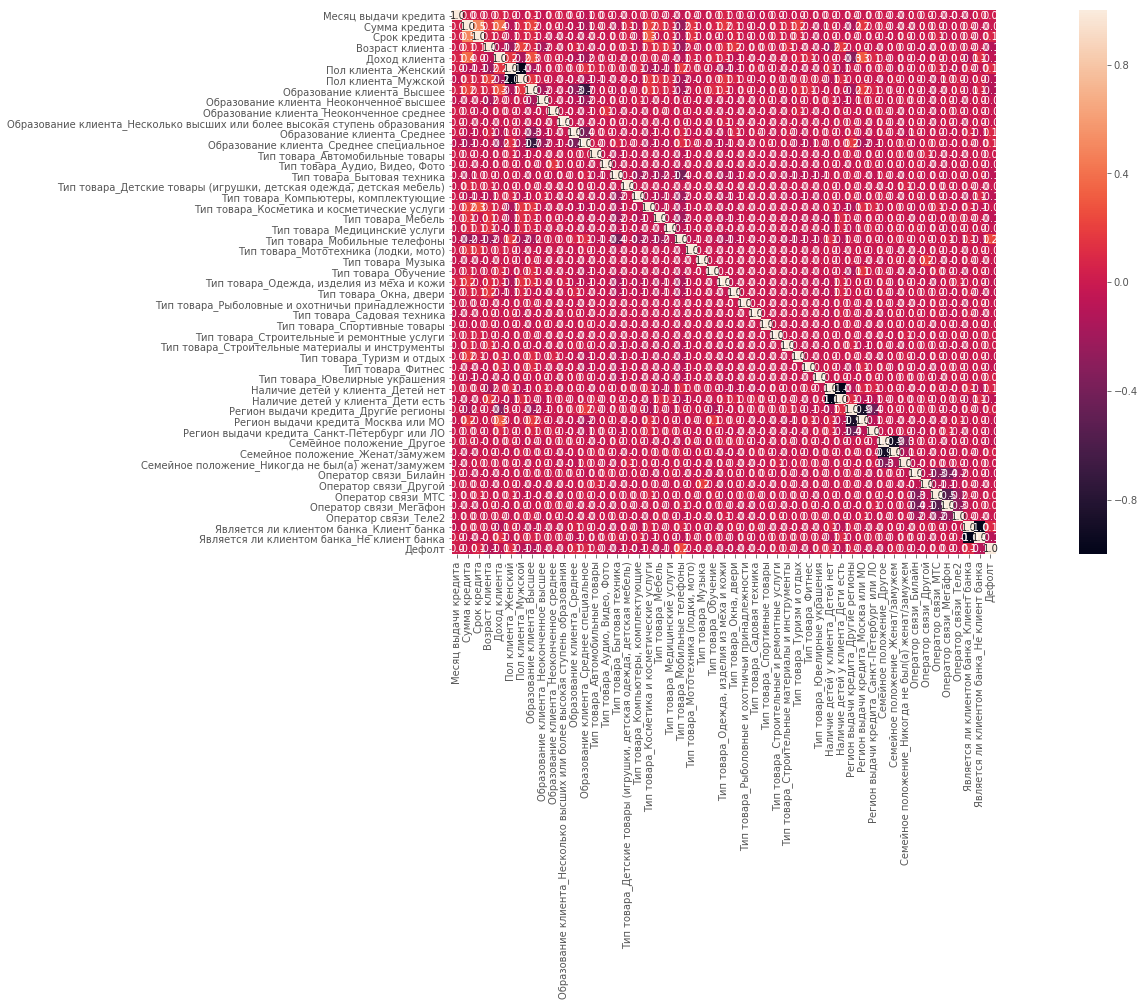

In [24]:
corr = df1.corr()
plt.subplots(figsize=(30,10))
sns.heatmap( corr, square=True, annot=True, fmt=".1f" )  

In [25]:
corr['Дефолт']

Месяц выдачи кредита                                                          0.019749
Сумма кредита                                                                -0.014035
Срок кредита                                                                  0.074508
Возраст клиента                                                              -0.102110
Доход клиента                                                                -0.056292
Пол клиента_Женский                                                           0.095017
Пол клиента_Мужской                                                          -0.095017
Образование клиента_Высшее                                                   -0.121771
Образование клиента_Неоконченное высшее                                      -0.040148
Образование клиента_Неоконченное среднее                                     -0.019328
Образование клиента_Несколько высших или более высокая ступень образования   -0.014963
Образование клиента_Среднее                

In [26]:
# Тип товара Возраст Клиента

# Применение машинного обучения 

In [27]:
X = df1.iloc[:,:-1]
y = df1.iloc[:,-1]

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, 
                     test_size=0.20,
                     stratify=y,
                     random_state=1)

In [29]:
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")

from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import cross_val_score

names = [ "Perceptron",
         "LogisticRegression",
         "Linear SVM", 
         "Decision Tree", 
         "Random Forest", 
         "RBF SVM",          
         "Neural Net", 
         "Naive Bayes",  
         "Nearest Neighbors"
            ] 

classifiers = [ 
    Perceptron(),
    LogisticRegression(penalty='l2', 
                          C=0.001,
                          random_state=1),
    SVC(kernel="linear", C=1),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=100, max_features=1),
    SVC(kernel='rbf',gamma=2, C=1),
    MLPClassifier(hidden_layer_sizes=(100,50), alpha=1),
    GaussianNB(),
    KNeighborsClassifier(5)
                 ]

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.3, 
                            random_state=0)

    
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
    
    
for name, clf in zip(names, classifiers):
    pipe = Pipeline( [ ('scl', StandardScaler()),
                   ('clf', clf)])
    pipe.fit(X_train, y_train)
    score = pipe.score(X_test, y_test)


    print("Algo: {0:<20s} and Score: {1:0.4f}".format(name, score))

Algo: Perceptron           and Score: 0.8511
Algo: LogisticRegression   and Score: 0.8956
Algo: Linear SVM           and Score: 0.8956
Algo: Decision Tree        and Score: 0.8878
Algo: Random Forest        and Score: 0.8956
Algo: RBF SVM              and Score: 0.8956
Algo: Neural Net           and Score: 0.8956
Algo: Naive Bayes          and Score: 0.1528
Algo: Nearest Neighbors    and Score: 0.8781


### Объединим три самых точных алгоритма 

In [30]:
from sklearn.base import BaseEstimator
from sklearn.base import ClassifierMixin
from sklearn.preprocessing import LabelEncoder
from sklearn.externals import six
from sklearn.base import clone
from sklearn.pipeline import _name_estimators
import numpy as np
import operator


class MajorityVoteClassifier(BaseEstimator, 
                             ClassifierMixin):
    """ A majority vote ensemble classifier

    Parameters
    ----------
    classifiers : array-like, shape = [n_classifiers]
      Different classifiers for the ensemble

    vote : str, {'classlabel', 'probability'} (default='label')
      If 'classlabel' the prediction is based on the argmax of
        class labels. Else if 'probability', the argmax of
        the sum of probabilities is used to predict the class label
        (recommended for calibrated classifiers).

    weights : array-like, shape = [n_classifiers], optional (default=None)
      If a list of int or float values are provided, the classifiers
      are weighted by importance; Uses uniform weights if weights=None.

    """
    def __init__(self, classifiers, vote='classlabel', weights=None):

        self.classifiers = classifiers
        self.named_classifiers = {key: value for key, value
                                  in _name_estimators(classifiers)}
        self.vote = vote
        self.weights = weights

    def fit(self, X, y):
        """ Fit classifiers.

        Parameters
        ----------
        X : {array-like, sparse matrix}, shape = [n_samples, n_features]
            Matrix of training samples.

        y : array-like, shape = [n_samples]
            Vector of target class labels.

        Returns
        -------
        self : object

        """
        if self.vote not in ('probability', 'classlabel'):
            raise ValueError("vote must be 'probability' or 'classlabel'"
                             "; got (vote=%r)"
                             % self.vote)

        if self.weights and len(self.weights) != len(self.classifiers):
            raise ValueError('Number of classifiers and weights must be equal'
                             '; got %d weights, %d classifiers'
                             % (len(self.weights), len(self.classifiers)))

        # Use LabelEncoder to ensure class labels start with 0, which
        # is important for np.argmax call in self.predict
        self.lablenc_ = LabelEncoder()
        self.lablenc_.fit(y)
        self.classes_ = self.lablenc_.classes_
        self.classifiers_ = []
        for clf in self.classifiers:
            fitted_clf = clone(clf).fit(X, self.lablenc_.transform(y))
            self.classifiers_.append(fitted_clf)
        return self

    def predict(self, X):
        """ Predict class labels for X.

        Parameters
        ----------
        X : {array-like, sparse matrix}, shape = [n_samples, n_features]
            Matrix of training samples.

        Returns
        ----------
        maj_vote : array-like, shape = [n_samples]
            Predicted class labels.
            
        """
        if self.vote == 'probability':
            maj_vote = np.argmax(self.predict_proba(X), axis=1)
        else:  # 'classlabel' vote

            #  Collect results from clf.predict calls
            predictions = np.asarray([clf.predict(X)
                                      for clf in self.classifiers_]).T

            maj_vote = np.apply_along_axis(
                                      lambda x:
                                      np.argmax(np.bincount(x,
                                                weights=self.weights)),
                                      axis=1,
                                      arr=predictions)
        maj_vote = self.lablenc_.inverse_transform(maj_vote)
        return maj_vote

    def predict_proba(self, X):
        """ Predict class probabilities for X.

        Parameters
        ----------
        X : {array-like, sparse matrix}, shape = [n_samples, n_features]
            Training vectors, where n_samples is the number of samples and
            n_features is the number of features.

        Returns
        ----------
        avg_proba : array-like, shape = [n_samples, n_classes]
            Weighted average probability for each class per sample.

        """
        probas = np.asarray([clf.predict_proba(X)
                             for clf in self.classifiers_])
        avg_proba = np.average(probas, axis=0, weights=self.weights)
        return avg_proba

    def get_params(self, deep=True):
        """ Get classifier parameter names for GridSearch"""
        if not deep:
            return super(MajorityVoteClassifier, self).get_params(deep=False)
        else:
            out = self.named_classifiers.copy()
            for name, step in six.iteritems(self.named_classifiers):
                for key, value in six.iteritems(step.get_params(deep=True)):
                    out['%s__%s' % (name, key)] = value
            return out

In [31]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score


clf1 = MLPClassifier(hidden_layer_sizes=(100,50), alpha=1)
clf2 = LogisticRegression(penalty='l2', 
                          C=0.001,
                          random_state=1)
clf3 = RandomForestClassifier(max_depth=5, n_estimators=100, max_features=1)

pipe1 = Pipeline([['sc', StandardScaler()],
                  ['clf', clf1]])
pipe2 = Pipeline([['sc', StandardScaler()],
                  ['clf', clf2]])


clf_labels = ['Neural Net','Logistic Regression','Random Forest']

print('10-fold cross validation:\n')

for clf, label in zip([pipe1, pipe2, clf3],clf_labels):
    scores = cross_val_score(estimator=clf,
                             X=X_train,
                             y=y_train,
                             cv=10,
                             scoring='roc_auc')
    print("ROC AUC: %0.2f (+/- %0.2f) [%s]"
          % (scores.mean(), scores.std(), label))

10-fold cross validation:

ROC AUC: 0.67 (+/- 0.06) [Neural Net]
ROC AUC: 0.72 (+/- 0.08) [Logistic Regression]
ROC AUC: 0.70 (+/- 0.08) [Random Forest]


In [32]:
mv_clf = MajorityVoteClassifier(classifiers=[pipe1, pipe2, clf3])

clf_labels += ['Majority voting']

                              
all_clf = [pipe1, pipe2, clf3, mv_clf]

for clf, label in zip(all_clf, clf_labels):
    scores = cross_val_score(estimator=clf,
                             X=X_train,
                             y=y_train,
                             cv=10,
                             scoring='roc_auc')
    print("ROC AUC: %0.2f (+/- %0.2f) [%s]"
          % (scores.mean(), scores.std(), label))


ROC AUC: 0.67 (+/- 0.05) [Neural Net]
ROC AUC: 0.72 (+/- 0.08) [Logistic Regression]
ROC AUC: 0.70 (+/- 0.08) [Random Forest]
ROC AUC: 0.71 (+/- 0.07) [Majority voting]


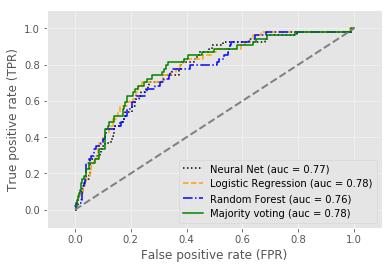

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

colors = ['black', 'orange', 'blue', 'green']   
linestyles = [':', '--', '-.', '-']            
for clf, label, clr, ls \
        in zip(all_clf,
               clf_labels, colors, linestyles):

    y_pred = clf.fit(X_train,
                     y_train).predict_proba(X_test)[:, 1]   

    fpr, tpr, thresholds = roc_curve(y_true=y_test,
                                     y_score=y_pred)
    roc_auc = auc(x=fpr, y=tpr)
    plt.plot(fpr, tpr,
             color=clr,
             linestyle=ls,
             label='%s (auc = %0.2f)' % (label, roc_auc))

plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1],
         linestyle='--',
         color='gray',
         linewidth=2)

plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.grid(alpha=0.5)
plt.xlabel('False positive rate (FPR)')
plt.ylabel('True positive rate (TPR)')



plt.show()

### Улучшение модели

In [34]:
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
pipe_lr = make_pipeline(StandardScaler(),
                        PCA(n_components=2),
                        LogisticRegression())

pipe_lr.fit(X_train, y_train)
y_pred = pipe_lr.predict(X_test)
print('Test Accuracy: %.3f' % pipe_lr.score(X_test, y_test))

Test Accuracy: 0.896


In [35]:
scores = cross_val_score(estimator=pipe_lr,
                         X=X_train,
                         y=y_train,
                         cv=10,
                         n_jobs=1)

print('CV accuracy scores: %s' % scores)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

CV accuracy scores: [0.87704918 0.87704918 0.88429752 0.88429752 0.88333333 0.88333333
 0.88333333 0.88333333 0.88333333 0.88333333]
CV accuracy: 0.882 +/- 0.003


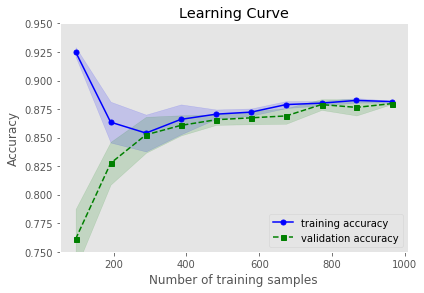

In [36]:
from sklearn.model_selection import learning_curve

pipe_lr = make_pipeline(StandardScaler(),
                        LogisticRegression(penalty='l2', random_state=1))

train_sizes, train_scores, test_scores =\
                learning_curve(estimator=pipe_lr,
                               X=X_train,
                               y=y_train,
                               train_sizes=np.linspace(0.1, 1.0, 10),
                               cv=5,
                               n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='training accuracy')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='validation accuracy')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.75, 0.95])
plt.tight_layout()
#plt.savefig('images/06_05.png', dpi=300)
plt.title('Learning Curve')
plt.show()

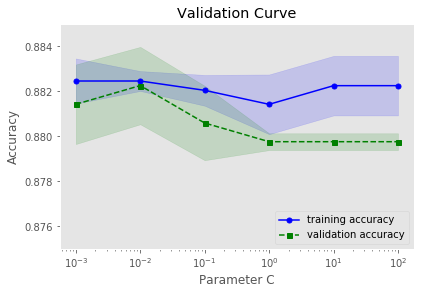

In [37]:
from sklearn.model_selection import validation_curve


param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]

train_scores, test_scores = validation_curve(
                estimator=pipe_lr, 
                X=X_train, 
                y=y_train, 
                param_name='logisticregression__C', 
                param_range=param_range,
                cv=5)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_mean, 
         color='blue', marker='o', 
         markersize=5, label='training accuracy')

plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, alpha=0.15,
                 color='blue')

plt.plot(param_range, test_mean, 
         color='green', linestyle='--', 
         marker='s', markersize=5, 
         label='validation accuracy')

plt.fill_between(param_range, 
                 test_mean + test_std,
                 test_mean - test_std, 
                 alpha=0.15, color='green')

plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('Parameter C')
plt.ylabel('Accuracy')
plt.ylim([0.875, 0.885])
plt.tight_layout()
# plt.savefig('images/06_06.png', dpi=300)
plt.title('Validation Curve')
plt.show()

In [38]:
from sklearn.model_selection import GridSearchCV

param_grid = {"logisticregression__C": [0.001, 0.01, 0.1, 1, 10, 100],
              "logisticregression__penalty" : ['l1', 'l2']}


# Create hyperparameter options

gs = GridSearchCV(pipe_lr,param_grid, cv = 10)

In [39]:
best_model = gs.fit(X_train,y_train)

In [40]:
print('Best Penalty:', best_model.best_estimator_.get_params()['logisticregression__penalty'])
print('Best C:', best_model.best_estimator_.get_params()['logisticregression__C'])

Best Penalty: l1
Best C: 0.001


In [41]:
print(gs.best_score_)
print(gs.best_params_)

0.8822553897180763
{'logisticregression__C': 0.001, 'logisticregression__penalty': 'l1'}


### анализ 